In [23]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [24]:
df = pd.read_csv('train.csv')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


#  Sales Comparison Graph 
    

In [25]:
df['Order Date'] = pd.to_datetime(df['Order Date'],format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Order Date'],format='%d/%m/%Y')
df['year'] = df['Order Date'].dt.year
sdf = df.groupby('year').agg(
    totalsale = ('Sales','sum')
)
sdf = sdf.reset_index()
sdf = sdf.sort_values(by='year')
sdf

,year,totalsale
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


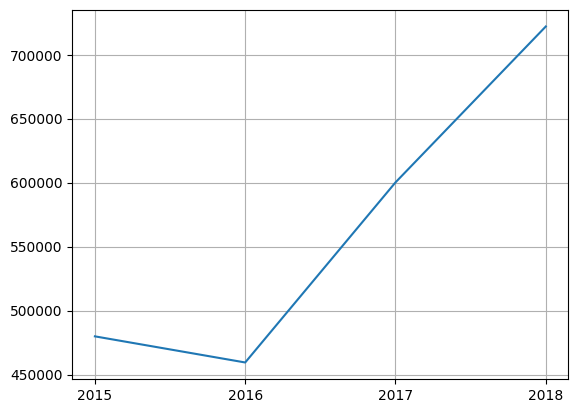

In [26]:
plt.plot(sdf['year'].astype('str'),sdf['totalsale'])
plt.grid()
plt.show()

# Year - Month Comparison


In [27]:
df['month']=df['Order Date'].dt.month_name()
df['month_num'] = df['Order Date'].dt.month
ndf = df.groupby(['year','month_num','month']).agg(monthsale=('Sales','sum'))
ndf = ndf.reset_index()
ndf

,year,month_num,month,monthsale
0,2015,1,January,14205.7070
1,2015,2,February,4519.8920
2,2015,3,March,55205.7970
3,2015,4,April,27906.8550
4,2015,5,May,23644.3030
5,2015,6,June,34322.9356
6,2015,7,July,33781.5430
7,2015,8,August,27117.5365
8,2015,9,September,81623.5268
9,2015,10,October,31453.3930


# Did Our UserBase Grow

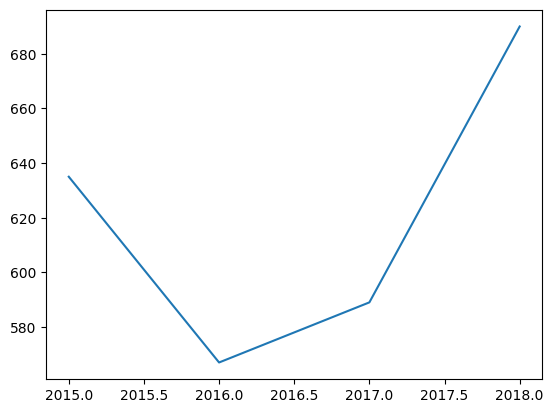

In [28]:
cust_year={}
for year in list(df['year'].unique()):
    cust_year[year]=len(df.loc[df['year']==year]['Customer ID'].unique())

l = list(cust_year.keys())
l.sort()
plt.plot(l,list(cust_year.values()))

<Axes: xlabel='Segment', ylabel='count'>

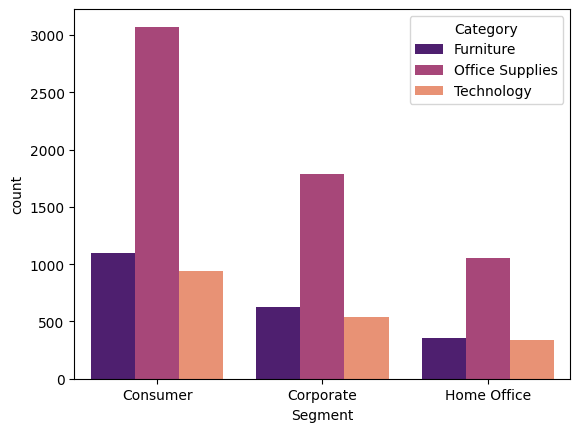

In [29]:
sns.countplot(data=df,x='Segment',hue='Category',palette='magma')

# Sales In Any Particular Year Monthly

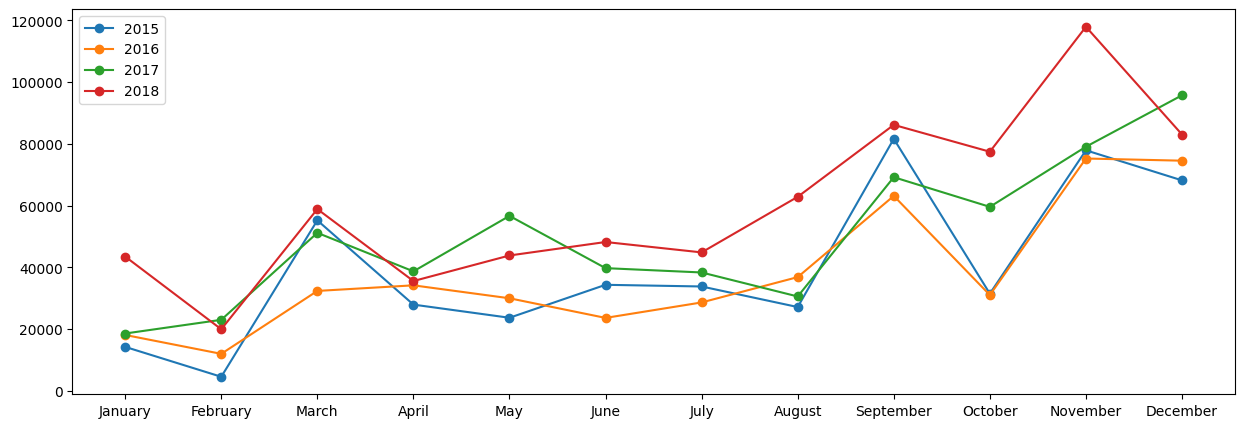

In [30]:
# 
plt.figure(figsize=(15,5))
for year in [2015,2016,2017,2018]:
    ndf = df.loc[df['year']==year]

    sdf = ndf.groupby(['month_num','month']).agg(totalsale=('Sales','sum')).reset_index()
    plt.plot(sdf['month'],sdf['totalsale'],label=year,marker='o')
    plt.legend()

plt.show()